# Finding the MRI brain tuor detection dataset

In [4]:
!pip install opencv-contrib-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 MB 5.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [17]:
# important important libraries

import numpy as np 
import torch 
import matplotlib.pyplot as plt 
import seaborn as sns 
from torch.utils.data import Dataset, DataLoader
import glob
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2

In [59]:
np.random.seed(42)

In [39]:
# Reading image
tumor = []
path = './brain_tumor_dataset/yes/*.jpg'
image_extensions = ['jpg', 'jpeg', 'png', 'bmp', 'tiff']

"""for ext in  image_extensions:
    path = './brain_tumor_dataset/yes/*.{ext}'"""
for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img, (128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r , g, b])
    tumor.append(img)
    



In [40]:
len(tumor)

86

In [41]:
for img in tumor:
    print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [67]:
no_tumor = []
path = './brain_tumor_dataset/no/*.jpg'
image_extensions = ['jpg', 'jpeg', 'png', 'bmp', 'tiff']

"""for ext in  image_extensions:
    path = './brain_tumor_dataset/no/*.{ext}'"""
for f in glob.iglob(path):
    img = cv2.imread(f)
    img = cv2.resize(img, (128,128))
    b, g, r = cv2.split(img)
    img = cv2.merge([r , g, b])
    no_tumor.append(img)

In [68]:
len(no_tumor)

85

In [69]:
no_tumor = np.array(no_tumor)
tumor = np.array(tumor)

In [70]:
tumor.shape

(86, 128, 128, 3)

In [71]:
no_tumor.shape

(85, 128, 128, 3)

In [72]:
all = np.concatenate((no_tumor,tumor))
all.shape

(171, 128, 128, 3)

In [73]:
# Check for None images in tumor list
for idx, img in enumerate(tumor):
    if img is None:
        print(f"Image at index {idx} is None.")


# Visualizing Brain MRI Images

In [87]:

def plot_random(no_tumor, tumor, num = 5):
    no_tumor_indices = np.random.choice(len(no_tumor), num, replace=False)
    tumor_indices = np.random.choice(len(tumor), num, replace=False)
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('no_tumor')
        plt.imshow(no_tumor[no_tumor_indices[i]])
        plt.axis('off')
    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('tumor')
        plt.imshow(tumor[tumor_indices[i]])
        plt.axis('off')
    

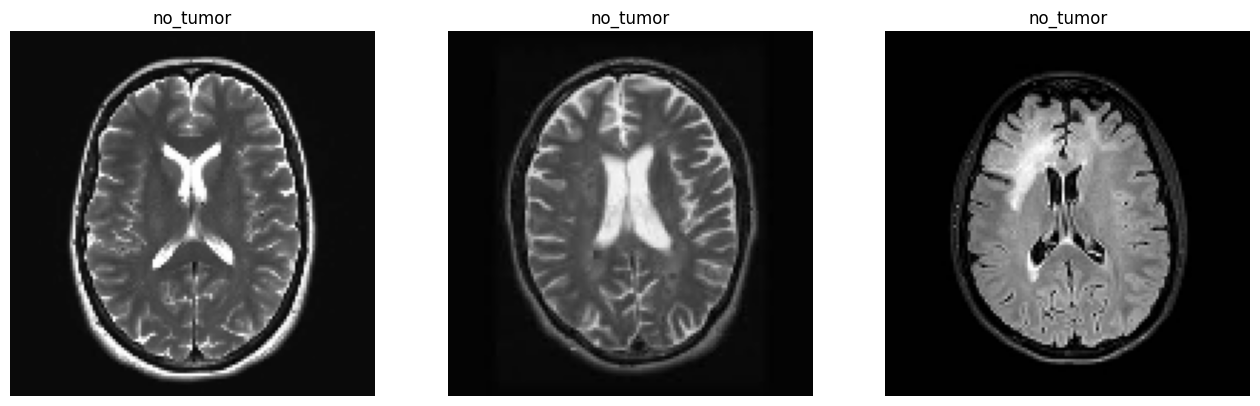

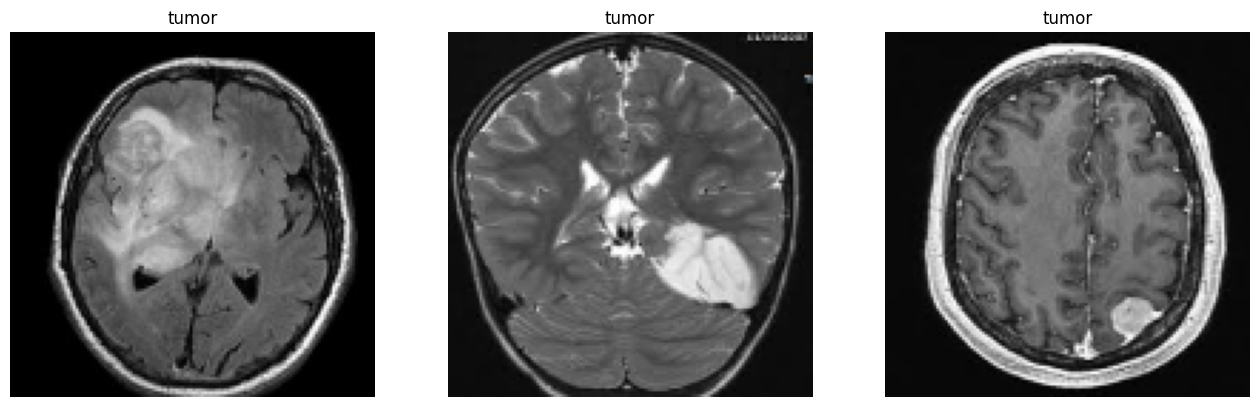

In [89]:
plot_random(no_tumor,tumor, num = 3)

### Create Torch Dataset Class


In [90]:
class Dataset(object):
    """An abstract class representing a Dataset.
    
    All other datasets should subclass it. All subclasses should override
    ``__len__``, that provudes the size of the dataset, and ``__getitem__``
    supporting integer indexing in range from 0 to len(self) exclusive
    """
    
    def __getitem__(self,index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError
    
    def __add__(self, other):
        return ConcatDataset([self,other])

In [91]:
class MRI(Dataset):
    def __init__(self,scores):
        self.x = scores
        

In [92]:
d = MRI()

In [93]:
d